Matthew Donaldson
Machine Learning 
Assignment 2


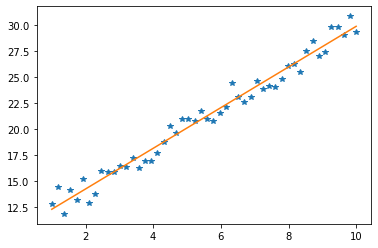

Sum of the Squares of the Residuals:  [36.00659275]
Beta_hat_1:  [1.95605658]
Beta_hat_0:  [10.29669014]


In [566]:
## Assignment 2 Problem 1b
import matplotlib.pyplot as plt
import numpy as np

n = 50
x = np.linspace(1, 10, n)
x = x.reshape(-1,1)
epsilon = np.random.normal(0, 1, n)
epsilon = epsilon.reshape(-1,1)
y = 10 + 2*x + epsilon

plt.plot(x,y, '*')


######################################################################################
## Problem 1c

x_bar = (1/n)*sum(x)
y_bar = (1/n)*sum(y)
beta_hat_1 = ((np.sum(x*y)) - n*x_bar*y_bar)/(sum(x**2) - n*x_bar**2)
beta_hat_0 = y_bar - beta_hat_1*x_bar

y_hat = beta_hat_0 + beta_hat_1*x
SS_Residuals = sum((y-y_hat)**2)

plt.plot(x,y_hat)
plt.show()
print('Sum of the Squares of the Residuals: ', SS_Residuals)
print('Beta_hat_1: ', beta_hat_1)
print('Beta_hat_0: ', beta_hat_0)

In [567]:
#########################################################################################
## Problem 1d - sk learn
from sklearn.linear_model import LinearRegression
## Function below is defined for linear regression and returns the slope and y-intercept
def linearReg(x,y):
    reg = LinearRegression()
    reg.fit(x, y)
    m = reg.coef_
    b =  reg.intercept_
    return m, b

m = linearReg(x,y)[0]
b = linearReg(x,y)[1]
print('model coef: ', m)
print('model intercept: ', b)

model coef:  [[1.95605658]]
model intercept:  [10.29669014]


As seen in part 1d, the slope and intercept match with the slope(beta1) and intercept(beta0) in part c.

Weights:  [ 0.          4.01749254  4.01749254 -8.83028732 -8.83028732 -8.83028732
  4.44569438  4.44569438  4.44569438  4.44569438]
Intercept 0.4195190436653031


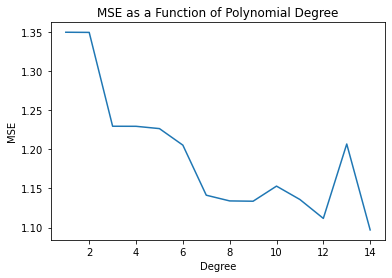

In [574]:
## Problem 2a 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

################################################################################
## Making the synthetic data set with random noise
x1, x2 = np.linspace(0,1,100), np.linspace(0,1,100)
epsilon = np.random.normal(0, 1, 100)
y = np.sin(x1 + 5*x2) + epsilon
x = np.transpose(([x1,x2]))
################################################################################
degree = []
mean_squared_value = []
## Polynomial Features
for i in range(1,15):
    d = i
    ## Gets the weights
    poly_features = PolynomialFeatures(d)
    # Initializes a linear model and fits the model to the data
    lrg = LinearRegression()
    pl = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
    pl.fit(x,y)

    ## Predicts the output using the polynomial features found in PolynomialFeatures(d)
    prediction_pl = pl.predict(x)

    ## Mean Squared Error Calculations
    MSE = mean_squared_error(y, prediction_pl)
    #print('MSE: ', MSE)
    #print('d: ', d)
    degree.append(d)
    mean_squared_value.append(MSE)
    if i == 3:
        print('Weights: ', lrg.coef_)
        print('Intercept', lrg.intercept_)
        
plt.plot(degree, mean_squared_value)
plt.title('MSE as a Function of Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()




In [561]:
## Problem 2b
## Ridge Regression

from sklearn.linear_model import Ridge

def ridge(d, x, y, alpha):
    poly_features = PolynomialFeatures(d)
    # Initializes a linear model and fits the model to the data
    ridge = Ridge(alpha = alpha)
    pl = Pipeline([("polynomial_features",poly_features),("linear_regression",ridge)])
    pl.fit(x,y)

    prediction_pl = pl.predict(x)
    m = ridge.coef_
    b =  ridge.intercept_
    
    return m, b, alpha

for i in [0.1, 0.01, 0.001]:
    m = ridge(3, x, y, i)[0]
    b = ridge(3, x, y, i)[1]
    alpha = ridge(3, x, y, i)[2]
    
    print ("Lambda = ", alpha,":")
    print("Weights: ", m)
    print("Intercept: ", b)
    print("")

Lambda =  0.1 :
Weights:  [ 0.          0.52169496  0.52169496 -2.88390903 -2.88390903 -2.88390903
  1.48747071  1.48747071  1.48747071  1.48747071]
Intercept:  0.9081970925094375

Lambda =  0.01 :
Weights:  [ 0.          4.00380732  4.00380732 -8.52775009 -8.52775009 -8.52775009
  4.24733121  4.24733121  4.24733121  4.24733121]
Intercept:  0.3106921562536996

Lambda =  0.001 :
Weights:  [  0.           5.43532769   5.43532769 -10.82711736 -10.82711736
 -10.82711736   5.36557233   5.36557233   5.36557233   5.36557233]
Intercept:  0.060615542764430055



It can be seen that, on the trained ridge model, as lambda --> 0 the weights increase and the intercept goes toward 0. This seems to make sense because as lambda gets smaller the L2-norm in the ridge regression becomes smaller and the OLS dominates  

In [575]:
## Problem 2c
## Lasso Regression

from sklearn.linear_model import Lasso

## Lasso Regression uses the L1 norm in its calc. of least squares
def lasso(d, x, y, alpha):

    poly_features = PolynomialFeatures(d)
    # Initializes a linear model and fits the model to the data
    lasso = Lasso(alpha = alpha)
    pl = Pipeline([("polynomial_features",poly_features),("linear_regression",lasso)])
    pl.fit(x,y)

    prediction_pl = pl.predict(x)
    m = lasso.coef_
    b =  lasso.intercept_
    
    return m, b, alpha

for i in [0.1, 0.01, 0.001]:
    m = lasso(3, x, y, i)[0]
    b = lasso(3, x, y, i)[1]
    alpha = lasso(3, x, y, i)[2]
    
    print ("Lambda = ", alpha,":")
    print("Weights: ", m)
    print("Intercept: ", b)
    print("")
    



Lambda =  0.1 :
Weights:  [ 0.00000000e+00 -1.22161515e+00 -6.26825324e-16 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
Intercept:  0.6635348130215459

Lambda =  0.01 :
Weights:  [ 0.00000000e+00 -2.28022901e+00 -1.04470887e-16 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
Intercept:  1.192841743714615

Lambda =  0.001 :
Weights:  [ 0.00000000e+00  2.34187629e+00  1.05682097e-13 -1.28019736e+01
 -0.00000000e+00 -0.00000000e+00  8.91398580e+00  1.17850186e-12
  0.00000000e+00  0.00000000e+00]
Intercept:  0.9196592466679288



C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0575274660084517, tolerance: 0.018380804694177612
  model = cd_fast.enet_coordinate_descent(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0575274660084517, tolerance: 0.018380804694177612
  model = cd_fast.enet_coordinate_descent(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0575274660084517, tolerance: 0.018380804694177612
  model = cd_fast.enet_coordinate_descent(


It can be seen that, on the trained lasso model, as lambda --> 0 the weights increase and more of the wieghts are not zero, while the intercept seems to flucuate. Some similarities between the lasso and ridge regression are that they both seem to have increased weights as lambda --> 0.

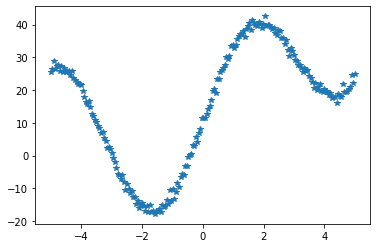

In [576]:
## Problem 3a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import random

x = np.linspace(-5, 5, 200)
y = 22*np.sin(x) + 0.6*x**2 + 4*x + 10 

for i in range(x.size):
    y[i] += random.gauss(0, 1)

x = np.transpose(x)

plt.plot(x,y,"*")
plt.show()

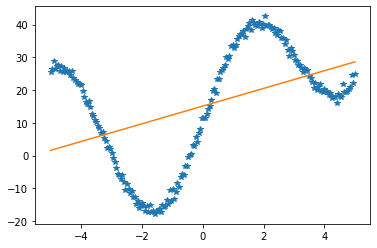

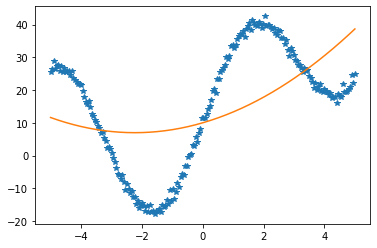

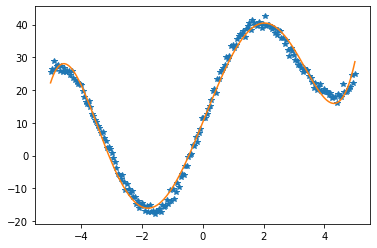

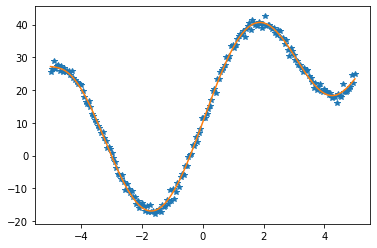

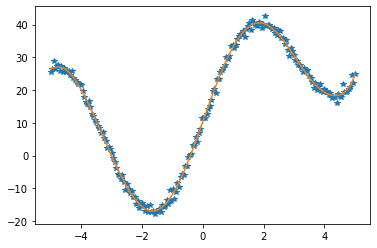

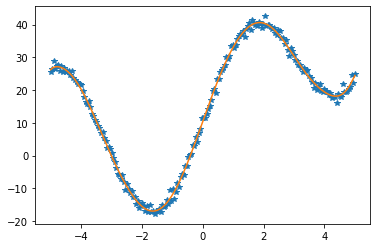

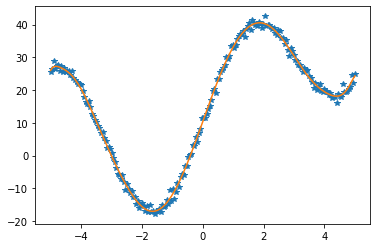

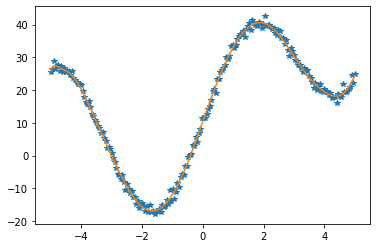

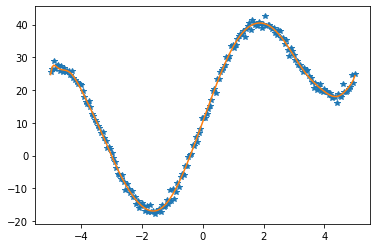

In [577]:
## Problem 3b

def poly(d, x, y):
    ## Gets the weights
    poly_features = PolynomialFeatures(d)
    # Initializes a linear model and fits the model to the data
    lrg = LinearRegression()
    pl = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
    pl.fit(x[:, np.newaxis],y)
    #print(y_train.reshape(-1,1))
    ## Predicts the output using the polynomial features found in PolynomialFeatures(d)
    prediction_pl = pl.predict(x[:,np.newaxis])
   
    ## Returns the predicted y value from the pipeline function
    return prediction_pl

for i in [1,2,5,8,12,14,16,18,20]:
    y_pred = poly(i,x, y)
    plt.plot(x,y,'*')
    plt.plot(x,y_pred)
    plt.show()




The above plots show the prediction curves for different polynomial degrees. It should be noted that from top to bottom the degrees are as followed: 1, 2, 5, 8, 12, 14, 16, 18, 20. with the blue point being the training data and the orange line being the prediction curve. From the plots alone I believe that degree  best fits the training data is 20, but this is due to over fitting and is not the optimal degree for the model. 

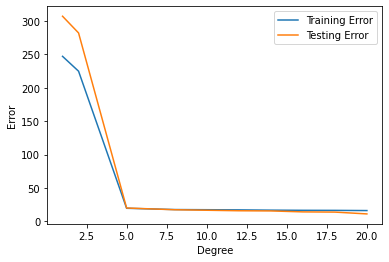

<class 'dict'>


,Degree,Training Error,Test Error
0,1,247.212964,307.288180
1,2,224.952970,282.248196
2,5,19.603041,20.010976
3,8,17.700322,17.425840
4,12,17.213575,15.904162
5,14,16.794327,15.632765
6,16,16.563050,14.212902
7,18,16.468323,13.889728
8,20,16.185699,11.162187


In [587]:
## Problem 3c

def error(n, y, y_hat):
    return 1/n*sum((y-y_hat)**2)

training_err = []
test_err = []
degree1 = []
degree2 = []

for i in [1,2,5,8,12,14,16,18,20]:
    y_pred = poly(i,x_train,y_train)
    training_err.append(error(len(y_train),y_train, y_pred))
    degree1.append(i)

for i in [1,2,5,8,12,14,16,18,20]:
    y_pred = poly(i,x_test,y_test)
    test_err.append(error(len(y_test),y_test, y_pred))
    degree2.append(i)


   
plt.plot(degree1, training_err, label = 'Training Error')
plt.plot(degree2, test_err, label = 'Testing Error')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend()
plt.show()
    
data = {'Degree': degree2, 'Training Error': training_err,'Test Error': test_err}

print(type(data))

err = pd.DataFrame(data)
err


It can be seent that as the degree increases the error on the traingin data and testing data decreases considerable. This confirms my answer for 3b, as polynomial degree 20 best fits the data. But again this is due to overfitting. Overfitting is when the algorithm takes the noise into account while inderfitting doesn't capture the the true model from the data. Both can be seen in 3b. Degrees 1,2, show that it has not captured the true function and does not predict what the data will look like, while degrees 18,20 bend and curve to the imperfections from the noise, going away from the true model. I think degree 8 gives the best generailization to the test data because its test error isn't to high for underfitting but not to low for overfitting.